In [1]:
%matplotlib inline
from Game import *
from Game.minimax import *
inf=1e500

Version:  0.3.03


In [2]:
def initial_state():
    return 6

def valid_moves(state,player):
    if state==2:
        return [1,2]
    elif state==1:
        return [1]
    else:
        return [1,2,3 ]

def update_state(state,player,move):
    new_state=state-move
    return new_state

def win_status(new_state,player):
    
    if new_state==1:
        return "win"
    
    if new_state==0:
        return "lose"
    
    return None
    
def show_state(state,player):
    print(state)

In [3]:
state=6

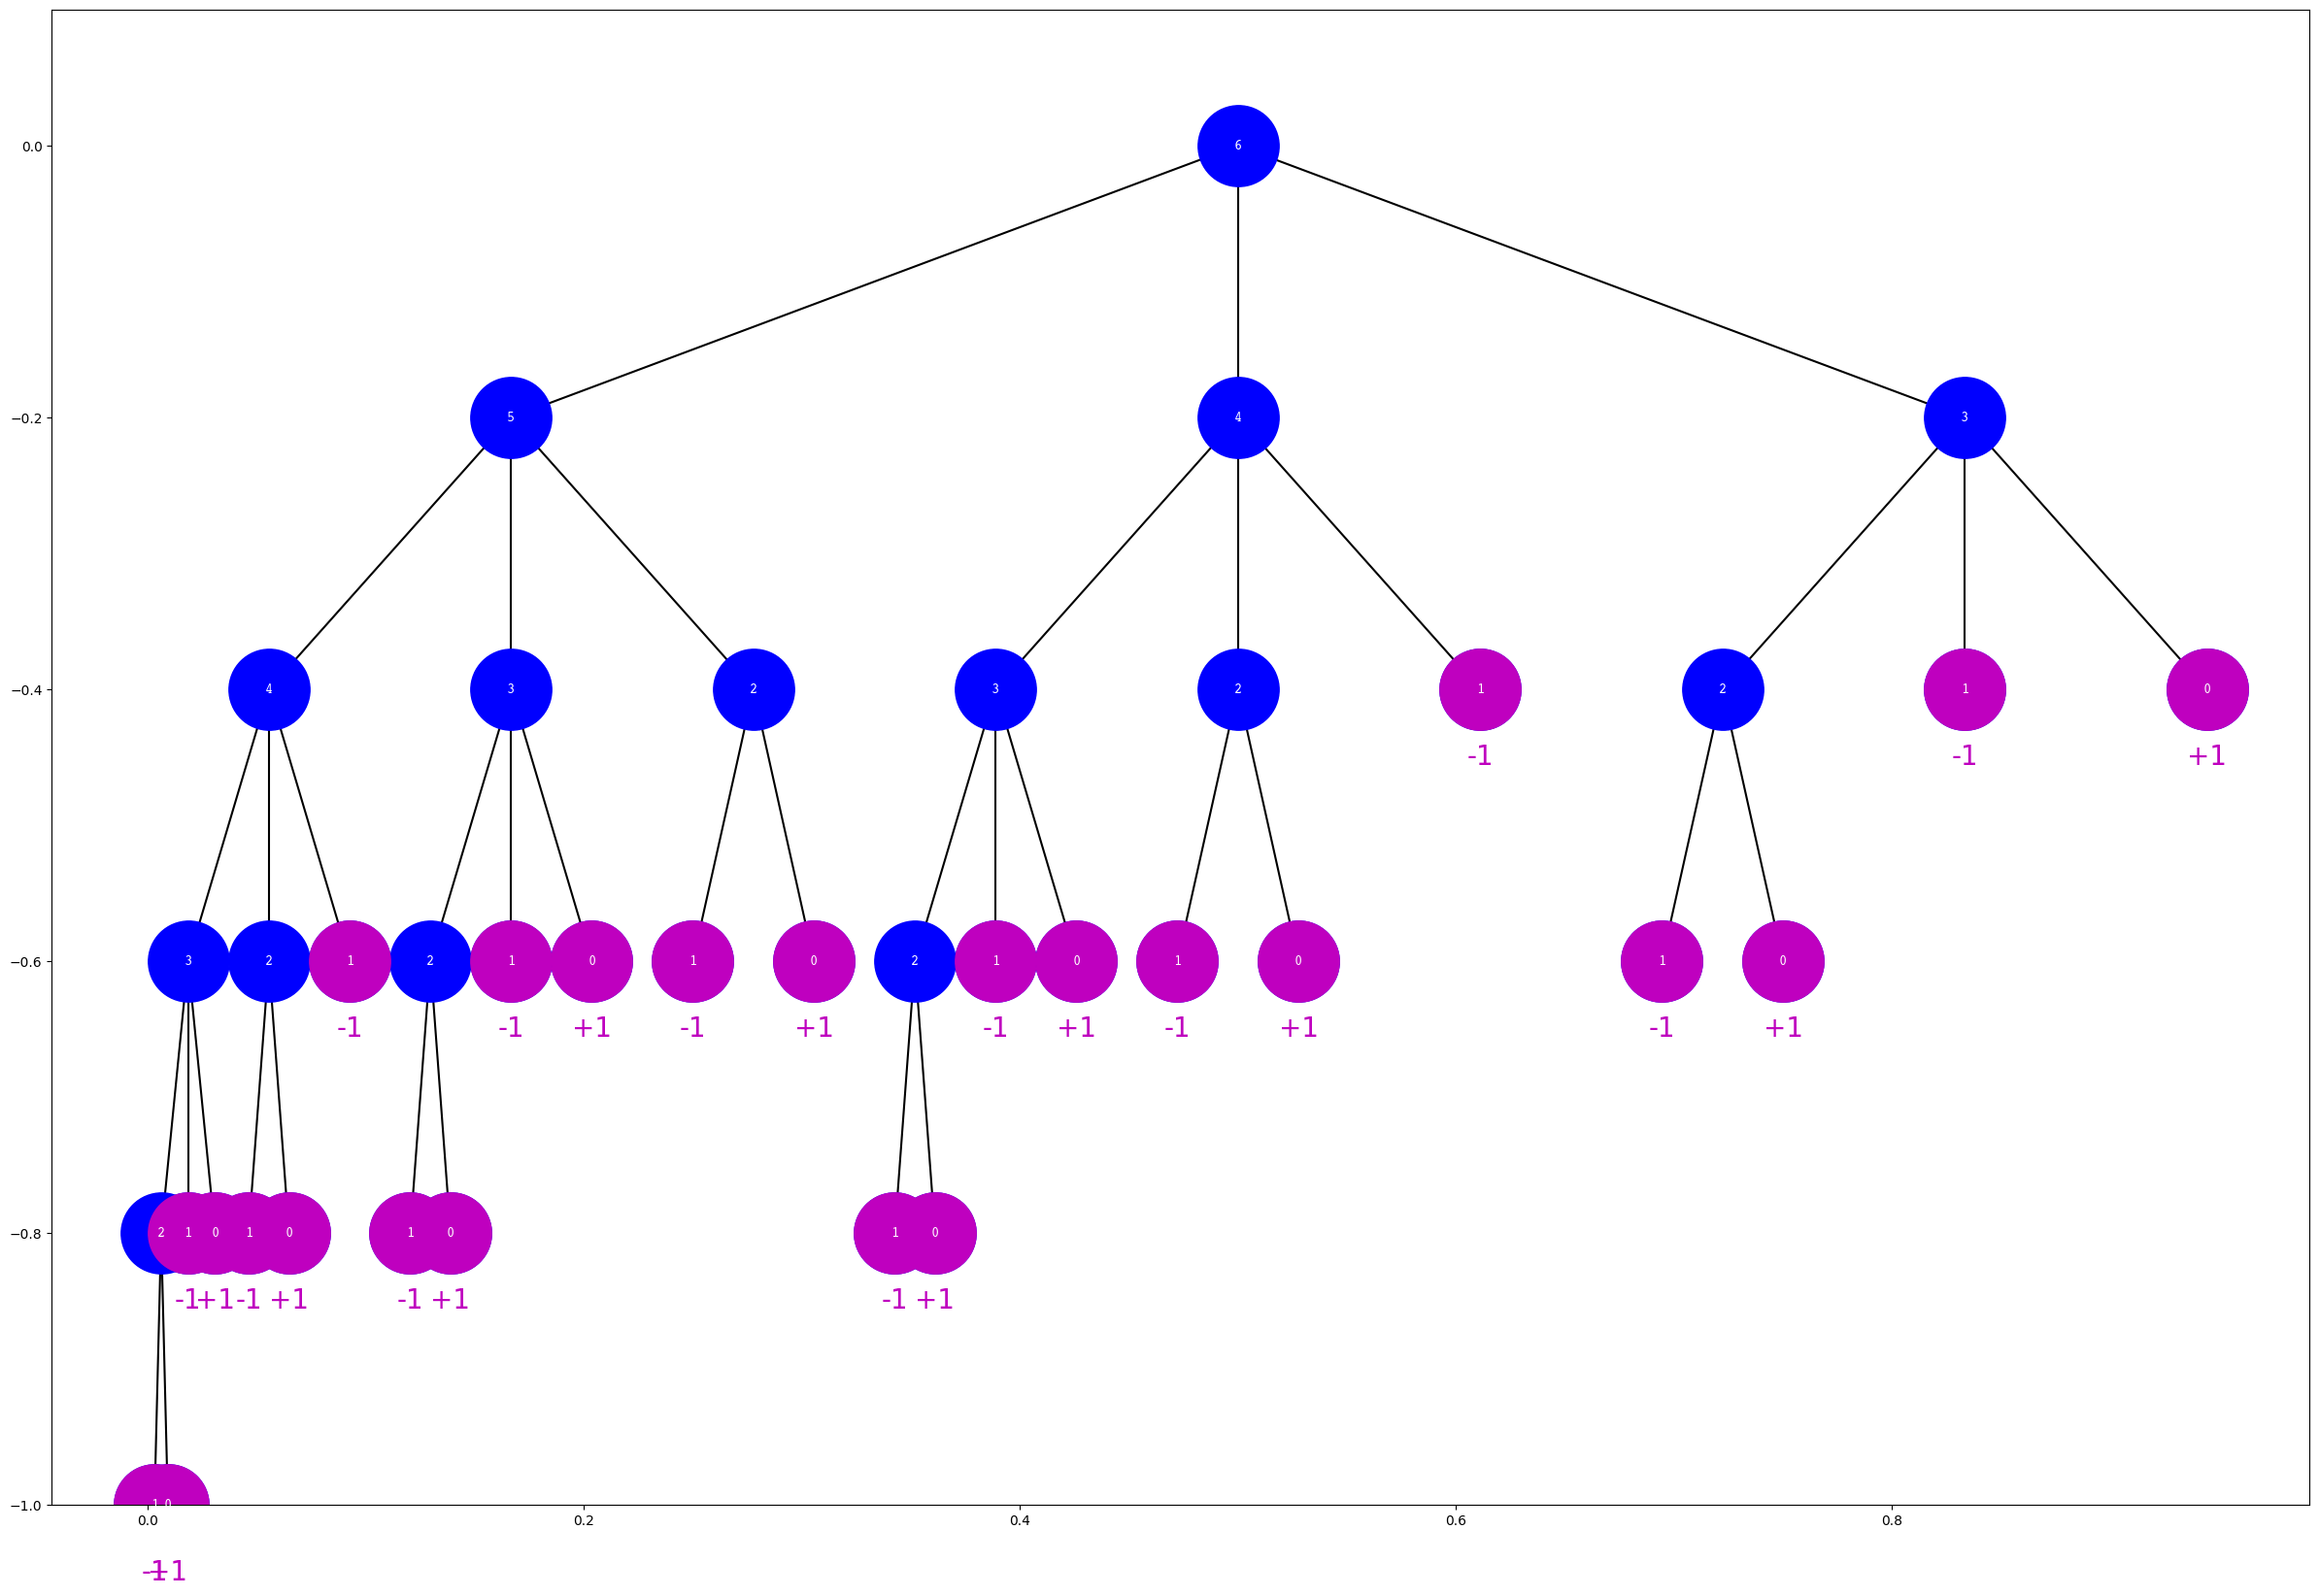

In [4]:
plot_minimax_tree(state,1)

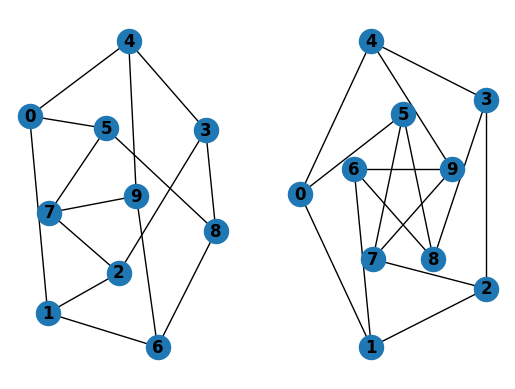

In [5]:
import networkx as nx
import matplotlib.pylab as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

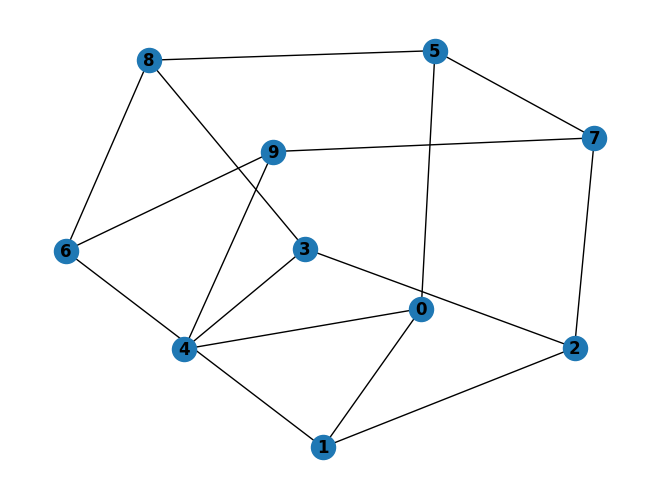

In [6]:
G = nx.from_dict_of_lists(
        {
            0: [1, 4, 5],
            1: [0, 2, 6],
            2: [1, 3, 7],
            3: [2, 4, 8],
            4: [3, 0, 9],
            5: [0, 7, 8],
            6: [1, 8, 9],
            7: [2, 5, 9],
            8: [3, 5, 6],
            9: [],
        },
    )

nx.draw(G, with_labels=True, font_weight='bold')

In [7]:
nx.petersen_graph??

Signature: nx.petersen_graph(create_using=None, *, backend=None, **backend_kwargs)
Source:   
@_raise_on_directed
@nx._dispatchable(graphs=None, returns_graph=True)
def petersen_graph(create_using=None):
    """
    Returns the Petersen graph.

    The Peterson graph is a cubic, undirected graph with 10 nodes and 15 edges [1]_.
    Julius Petersen constructed the graph as the smallest counterexample
    against the claim that a connected bridgeless cubic graph
    has an edge colouring with three colours [2]_.

    Parameters
    ----------
    create_using : NetworkX graph constructor, optional (default=nx.Graph)
       Graph type to create. If graph instance, then cleared before populated.

    Returns
    -------
    G : networkx Graph
        Petersen graph

    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/Petersen_graph
    .. [2] https://www.win.tue.nl/~aeb/drg/graphs/Petersen.html
    """
    G = nx.from_dict_of_lists(
        {
            0: [1, 4, 5],
  

In [11]:
D={}
S={}
state_count=0

def walk(current_state,player,current_state_count,depth=0,counts={},maxdepth=inf):
    global state_count
    
    if player==1:
        other_player=2
    else:
        other_player=1

    if depth>maxdepth:
        return 

    D[current_state_count]=[]
    S[current_state_count]=deepcopy(current_state)
    
    # since win_status is called with a player and an updated state
    # the current state is really the updated state from the
    # other player's last move.

    status=win_status(current_state,other_player)
    if not status in ['win','lose','stalemate',None]:
        raise ValueError("Win status returned '%s' not valid.  Allowed values only in ['win','lose','stalemate',None]." % status)

    if status=='win':  # bad for min
        return
    elif status=='lose':  # good for min
        return
    elif status=='stalemate':  # draw
        return


    moves=valid_moves(current_state,player)
    if moves is None:
        raise ValueError("valid_moves returned None with state=%s and player=%d - Did you forget to return the moves?" % (str(current_state),player))
    available_states=[update_state(deepcopy(current_state),player,move)
                                for move in moves]
    
    values=[]
    for state in available_states:
        state_count+=1
        D[current_state_count].append(state_count)
        walk(state,other_player,state_count,depth+1,counts,maxdepth)

    

In [12]:
walk(6,1,0,depth=3)

In [13]:
D

{0: [1, 22, 33],
 1: [2, 13, 19],
 2: [3, 9, 12],
 3: [4, 7, 8],
 4: [5, 6],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [10, 11],
 10: [],
 11: [],
 12: [],
 13: [14, 17, 18],
 14: [15, 16],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [20, 21],
 20: [],
 21: [],
 22: [23, 29, 32],
 23: [24, 27, 28],
 24: [25, 26],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [30, 31],
 30: [],
 31: [],
 32: [],
 33: [34, 37, 38],
 34: [35, 36],
 35: [],
 36: [],
 37: [],
 38: []}

In [14]:
S

{0: 6,
 1: 5,
 2: 4,
 3: 3,
 4: 2,
 5: 1,
 6: 0,
 7: 1,
 8: 0,
 9: 2,
 10: 1,
 11: 0,
 12: 1,
 13: 3,
 14: 2,
 15: 1,
 16: 0,
 17: 1,
 18: 0,
 19: 2,
 20: 1,
 21: 0,
 22: 4,
 23: 3,
 24: 2,
 25: 1,
 26: 0,
 27: 1,
 28: 0,
 29: 2,
 30: 1,
 31: 0,
 32: 1,
 33: 3,
 34: 2,
 35: 1,
 36: 0,
 37: 1,
 38: 0}

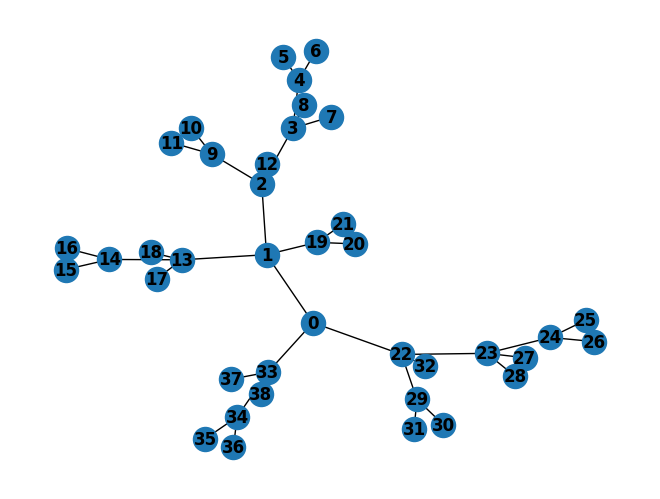

In [15]:
G = nx.from_dict_of_lists(
        D,
    )

nx.draw(G, with_labels=True, font_weight='bold')

In [16]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [17]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, leaf_vs_root_factor = 0.5):

    '''
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    Based on Joel's answer at https://stackoverflow.com/a/29597209/2966723,
    but with some modifications.  

    We include this because it may be useful for plotting transmission trees,
    and there is currently no networkx equivalent (though it may be coming soon).
    
    There are two basic approaches we think of to allocate the horizontal 
    location of a node.  
    
    - Top down: we allocate horizontal space to a node.  Then its ``k`` 
      descendants split up that horizontal space equally.  This tends to result
      in overlapping nodes when some have many descendants.
    - Bottom up: we allocate horizontal space to each leaf node.  A node at a 
      higher level gets the entire space allocated to its descendant leaves.
      Based on this, leaf nodes at higher levels get the same space as leaf
      nodes very deep in the tree.  
      
    We use use both of these approaches simultaneously with ``leaf_vs_root_factor`` 
    determining how much of the horizontal space is based on the bottom up 
    or top down approaches.  ``0`` gives pure bottom up, while 1 gives pure top
    down.   
    
    
    :Arguments: 
    
    **G** the graph (must be a tree)

    **root** the root node of the tree 
    - if the tree is directed and this is not given, the root will be found and used
    - if the tree is directed and this is given, then the positions will be 
      just for the descendants of this node.
    - if the tree is undirected and not given, then a random choice will be used.

    **width** horizontal space allocated for this branch - avoids overlap with other branches

    **vert_gap** gap between levels of hierarchy

    **vert_loc** vertical location of root
    
    **leaf_vs_root_factor**

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, leftmost, width, leafdx = 0.2, vert_gap = 0.2, vert_loc = 0, 
                    xcenter = 0.5, rootpos = None, 
                    leafpos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if rootpos is None:
            rootpos = {root:(xcenter,vert_loc)}
        else:
            rootpos[root] = (xcenter, vert_loc)
        if leafpos is None:
            leafpos = {}
        children = list(G.neighbors(root))
        leaf_count = 0
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            rootdx = width/len(children)
            nextx = xcenter - width/2 - rootdx/2
            for child in children:
                nextx += rootdx
                rootpos, leafpos, newleaves = _hierarchy_pos(G,child, leftmost+leaf_count*leafdx, 
                                    width=rootdx, leafdx=leafdx,
                                    vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, 
                                    xcenter=nextx, rootpos=rootpos, leafpos=leafpos, parent = root)
                leaf_count += newleaves

            leftmostchild = min((x for x,y in [leafpos[child] for child in children]))
            rightmostchild = max((x for x,y in [leafpos[child] for child in children]))
            leafpos[root] = ((leftmostchild+rightmostchild)/2, vert_loc)
        else:
            leaf_count = 1
            leafpos[root]  = (leftmost, vert_loc)
#        pos[root] = (leftmost + (leaf_count-1)*dx/2., vert_loc)
#        print(leaf_count)
        return rootpos, leafpos, leaf_count

    xcenter = width/2.
    if isinstance(G, nx.DiGraph):
        leafcount = len([node for node in nx.descendants(G, root) if G.out_degree(node)==0])
    elif isinstance(G, nx.Graph):
        leafcount = len([node for node in nx.node_connected_component(G, root) if G.degree(node)==1 and node != root])
    rootpos, leafpos, leaf_count = _hierarchy_pos(G, root, 0, width, 
                                                    leafdx=width*1./leafcount, 
                                                    vert_gap=vert_gap, 
                                                    vert_loc = vert_loc, 
                                                    xcenter = xcenter)
    pos = {}
    for node in rootpos:
        pos[node] = (leaf_vs_root_factor*leafpos[node][0] + (1-leaf_vs_root_factor)*rootpos[node][0], leafpos[node][1]) 
#    pos = {node:(leaf_vs_root_factor*x1+(1-leaf_vs_root_factor)*x2, y1) for ((x1,y1), (x2,y2)) in (leafpos[node], rootpos[node]) for node in rootpos}
    xmax = max(x for x,y in pos.values())
    for node in pos:
        pos[node]= (pos[node][0]*width/xmax, pos[node][1])
    return pos

In [35]:
import numpy as np

(np.float64(-0.09615384615384616),
 np.float64(2.09981684981685),
 np.float64(-2.1),
 np.float64(0.1))

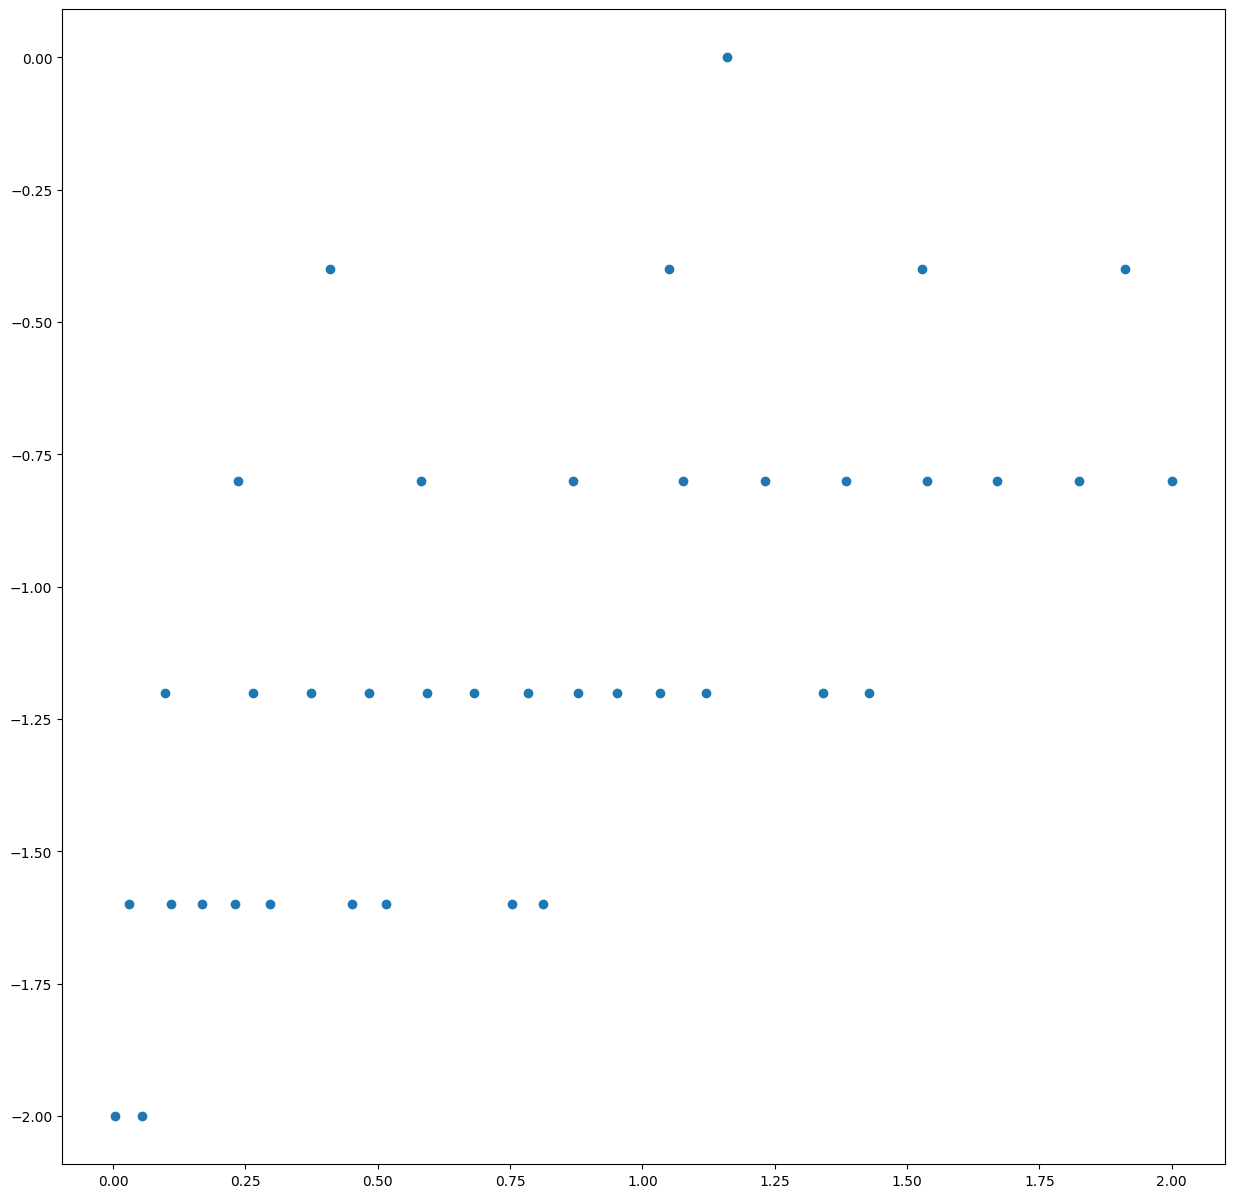

In [44]:
plt.figure(figsize=(15,15))
x,y=zip(*[pos[_] for _ in pos])
x=np.array(x)
y=np.array(y)

y=y*2
plt.plot(x,y,'o')
plt.axis('equal')

In [29]:
pos

{1: (1.1607142857142856, 0),
 0: (0.40934065934065933, -0.2),
 22: (0.23626373626373628, -0.4),
 23: (0.09890109890109891, -0.6000000000000001),
 24: (0.029304029304029304, -0.8),
 25: (0.003663003663003663, -1.0),
 26: (0.054945054945054944, -1.0),
 27: (0.10989010989010989, -0.8),
 28: (0.16849816849816848, -0.8),
 29: (0.26373626373626374, -0.6000000000000001),
 30: (0.23076923076923078, -0.8),
 31: (0.2967032967032967, -0.8),
 32: (0.3736263736263736, -0.6000000000000001),
 33: (0.5824175824175823, -0.4),
 34: (0.4835164835164836, -0.6000000000000001),
 35: (0.4505494505494505, -0.8),
 36: (0.5164835164835165, -0.8),
 37: (0.5934065934065934, -0.6000000000000001),
 38: (0.6813186813186812, -0.6000000000000001),
 2: (1.0494505494505495, -0.2),
 3: (0.8681318681318683, -0.4),
 4: (0.783882783882784, -0.6000000000000001),
 5: (0.7545787545787545, -0.8),
 6: (0.8131868131868132, -0.8),
 7: (0.8791208791208791, -0.6000000000000001),
 8: (0.9523809523809523, -0.6000000000000001),
 9: (1.

{1: (1.869718309859155, 0),
 2: (0.7394366197183099, -0.1),
 5: (0.22535211267605634, -0.2),
 11: (0.04929577464788733, -0.30000000000000004),
 12: (0.4014084507042254, -0.30000000000000004),
 6: (0.8028169014084507, -0.2),
 13: (0.8028169014084507, -0.30000000000000004),
 7: (1.2535211267605635, -0.2),
 3: (2.0281690140845074, -0.1),
 8: (1.7535211267605637, -0.2),
 9: (2.3028169014084505, -0.2),
 4: (3.0, -0.1),
 10: (3.0, -0.2)}

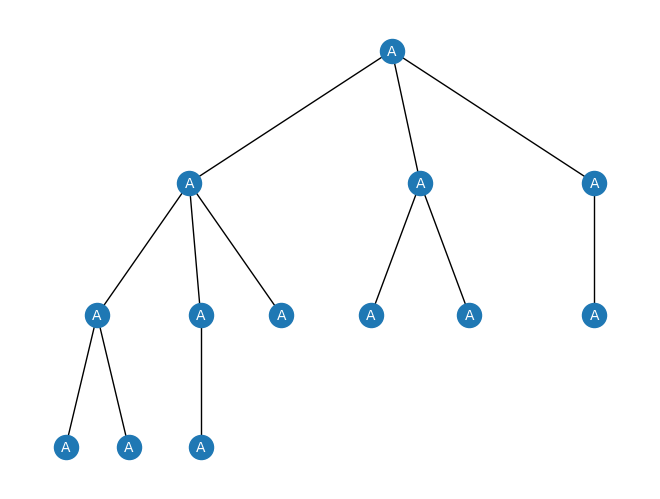

In [18]:
G=nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,13)])

pos = hierarchy_pos(G,1,width=1,vert_gap=.1)  

for key in pos:
    pos[key]=(pos[key][0]*3,pos[key][1])

res=nx.draw(G, pos=pos, with_labels=False)

for key in pos:
    x,y=pos[key]
    plt.text(x,y,'A',color='white',ha='center',va='center')

pos

In [19]:
nx.draw?

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

ax : Matplotlib Axes object, optional
    Draw the graph in specified Matplotlib axes.

kwds : optional keywords
    See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx
draw_networkx_nodes
d

In [20]:
D

{0: [1, 22, 33],
 1: [2, 13, 19],
 2: [3, 9, 12],
 3: [4, 7, 8],
 4: [5, 6],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [10, 11],
 10: [],
 11: [],
 12: [],
 13: [14, 17, 18],
 14: [15, 16],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [20, 21],
 20: [],
 21: [],
 22: [23, 29, 32],
 23: [24, 27, 28],
 24: [25, 26],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [30, 31],
 30: [],
 31: [],
 32: [],
 33: [34, 37, 38],
 34: [35, 36],
 35: [],
 36: [],
 37: [],
 38: []}

In [21]:
S

{0: 6,
 1: 5,
 2: 4,
 3: 3,
 4: 2,
 5: 1,
 6: 0,
 7: 1,
 8: 0,
 9: 2,
 10: 1,
 11: 0,
 12: 1,
 13: 3,
 14: 2,
 15: 1,
 16: 0,
 17: 1,
 18: 0,
 19: 2,
 20: 1,
 21: 0,
 22: 4,
 23: 3,
 24: 2,
 25: 1,
 26: 0,
 27: 1,
 28: 0,
 29: 2,
 30: 1,
 31: 0,
 32: 1,
 33: 3,
 34: 2,
 35: 1,
 36: 0,
 37: 1,
 38: 0}

In [22]:
edges=[]
for v in D:
    for w in D[v]:
        edges.append( (v,w) )
edges

[(0, 1),
 (0, 22),
 (0, 33),
 (1, 2),
 (1, 13),
 (1, 19),
 (2, 3),
 (2, 9),
 (2, 12),
 (3, 4),
 (3, 7),
 (3, 8),
 (4, 5),
 (4, 6),
 (9, 10),
 (9, 11),
 (13, 14),
 (13, 17),
 (13, 18),
 (14, 15),
 (14, 16),
 (19, 20),
 (19, 21),
 (22, 23),
 (22, 29),
 (22, 32),
 (23, 24),
 (23, 27),
 (23, 28),
 (24, 25),
 (24, 26),
 (29, 30),
 (29, 31),
 (33, 34),
 (33, 37),
 (33, 38),
 (34, 35),
 (34, 36)]

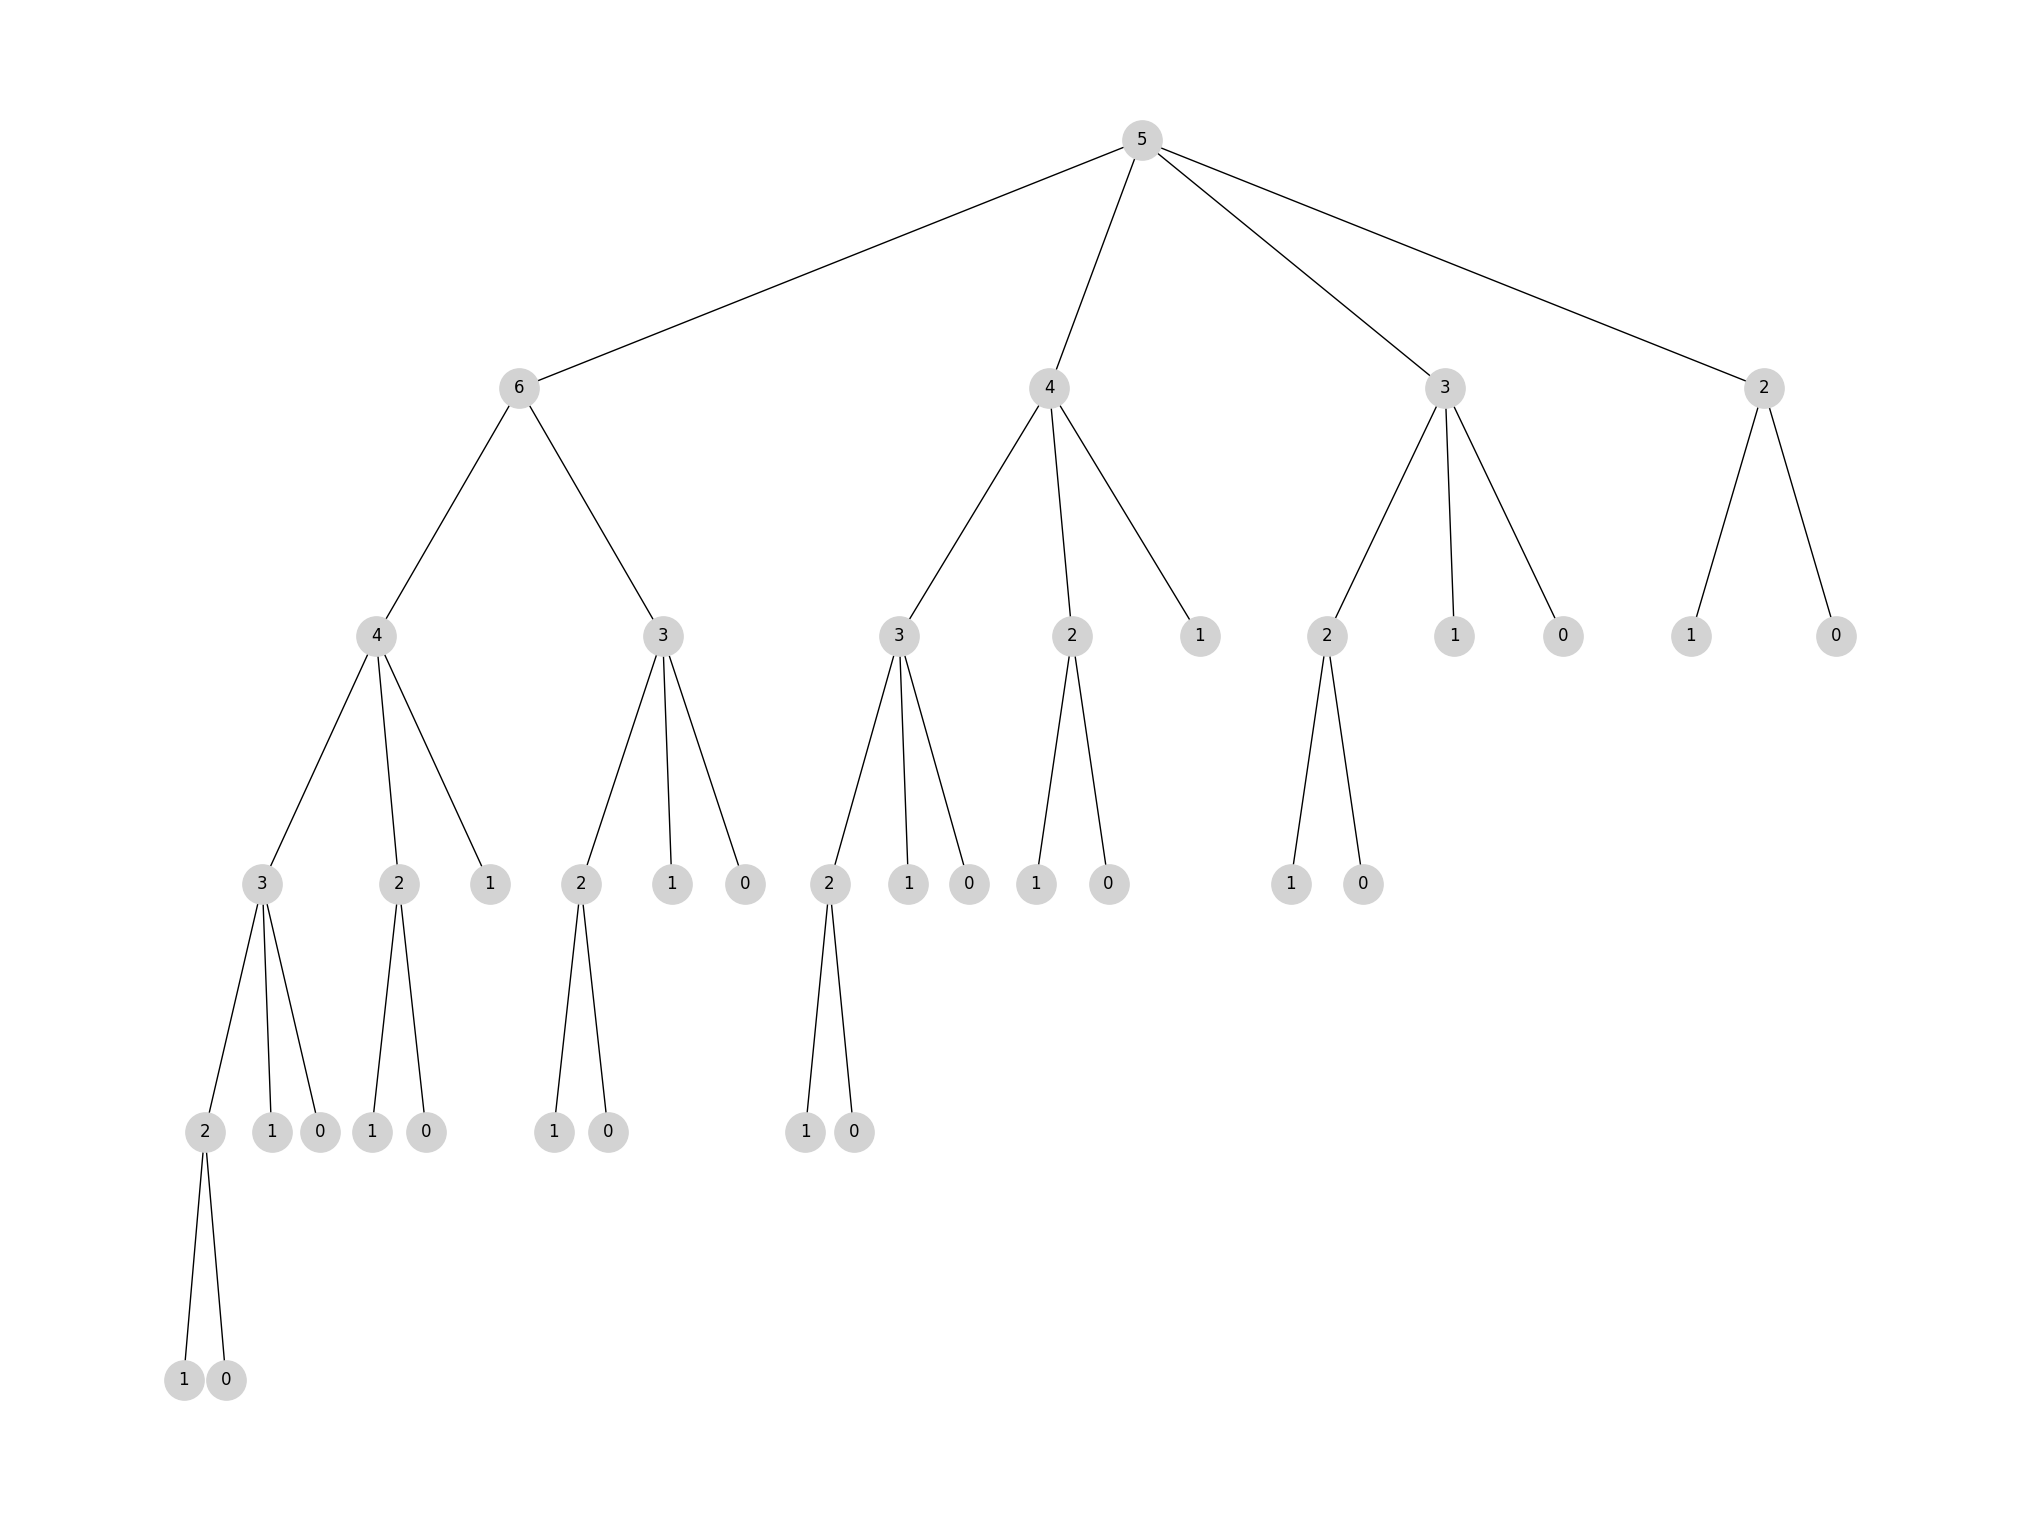

In [53]:
plt.figure(figsize=(20,15))

G=nx.Graph()
G.add_edges_from(edges)

pos = hierarchy_pos(G,1,width=2)    
nx.draw(G, pos=pos, with_labels=True,labels=S,node_color='lightgray',node_size=800)

In [24]:
nx.draw_networkx??

Signature: nx.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
Source:   
def draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds):
    r"""Draw the graph G using Matplotlib.

    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.

    arrows : bool or None, optional (default=None)
        If `None`, directed graphs draw arrowheads with
        `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
        via `~matplotlib.collections.LineCollection` for speed.
        If `True`, draw 

In [25]:
nx.draw_networkx?

Signature: nx.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

arrows : bool or None, optional (default=None)
    If `None`, directed graphs draw arrowheads with
    `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
    via `~matplotlib.collections.LineCollection` for speed.
    If `True`, draw arrowheads with FancyArrowPatches (bendable and stylish).
    If `False`, draw edges using LineCollection (linear and fast).
    For directed graph